### Importación de datos



In [33]:
!pip install pandas
!pip install matplotlib
!pip install seaborn



In [34]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [35]:
list_completa=[tienda,tienda2,tienda3,tienda4]

In [36]:
listas=pd.concat(list_completa)

In [37]:
listas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9435 entries, 0 to 2357
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Producto                9435 non-null   object 
 1   Categoría del Producto  9435 non-null   object 
 2   Precio                  9435 non-null   float64
 3   Costo de envío          9435 non-null   float64
 4   Fecha de Compra         9435 non-null   object 
 5   Vendedor                9435 non-null   object 
 6   Lugar de Compra         9435 non-null   object 
 7   Calificación            9435 non-null   int64  
 8   Método de pago          9435 non-null   object 
 9   Cantidad de cuotas      9435 non-null   int64  
 10  lat                     9435 non-null   float64
 11  lon                     9435 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 958.2+ KB


# 2. Ventas por categoría

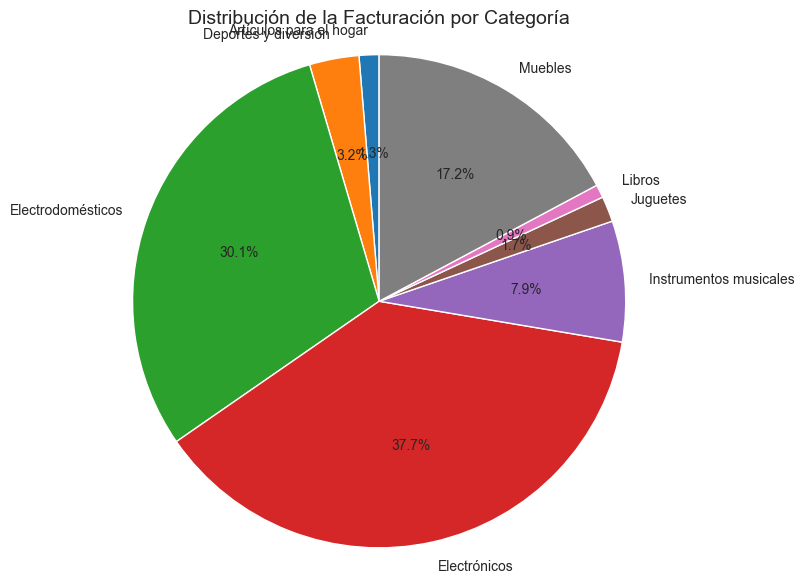

In [38]:
# 1. Los datos (los mismos que calculamos antes)
ventas_categoria = listas.groupby('Categoría del Producto')['Precio'].sum()

# 2. Creamos la figura
plt.figure(figsize=(7, 7)) # Un gráfico circular se ve mejor si es cuadrado

# 3. Creamos el gráfico circular
plt.pie(
    x=ventas_categoria.values,             # Los valores (la facturación)
    labels=ventas_categoria.index,         # Las etiquetas (los nombres de las categorías)
    autopct='%1.1f%%',                     # <-- Esto añade el porcentaje a cada "rebanada"
    startangle=90                          # Para que empiece ordenado desde arriba
)

# 4. Añadimos un título
plt.title('Distribución de la Facturación por Categoría', fontsize=14)

# 5. Le decimos a matplotlib que el gráfico debe ser un círculo
plt.axis('equal')

# 6. Mostramos el gráfico
plt.show()

# 3. Calificación promedio de la tienda


In [39]:
listas.info(
)
listas.columns

<class 'pandas.core.frame.DataFrame'>
Index: 9435 entries, 0 to 2357
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Producto                9435 non-null   object 
 1   Categoría del Producto  9435 non-null   object 
 2   Precio                  9435 non-null   float64
 3   Costo de envío          9435 non-null   float64
 4   Fecha de Compra         9435 non-null   object 
 5   Vendedor                9435 non-null   object 
 6   Lugar de Compra         9435 non-null   object 
 7   Calificación            9435 non-null   int64  
 8   Método de pago          9435 non-null   object 
 9   Cantidad de cuotas      9435 non-null   int64  
 10  lat                     9435 non-null   float64
 11  lon                     9435 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 958.2+ KB


Index(['Producto', 'Categoría del Producto', 'Precio', 'Costo de envío',
       'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificación',
       'Método de pago', 'Cantidad de cuotas', 'lat', 'lon'],
      dtype='object')

In [40]:
calificacion_promedio = listas.groupby('Lugar de Compra')['Calificación'].mean().sort_values()
# 1. Creamos la columna identificadora en cada tabla
tienda['Tienda_ID'] = 'Tienda 1'
tienda2['Tienda_ID'] = 'Tienda 2'
tienda3['Tienda_ID'] = 'Tienda 3'
tienda4['Tienda_ID'] = 'Tienda 4'

# 2. Volvemos a unir, sobreescribiendo la variable 'listas' con la nueva columna
listas = pd.concat([tienda, tienda2, tienda3, tienda4], ignore_index=True)

# 3. Limpiamos las columnas (por si acaso, ya que tenías un error de tilde antes)
listas.columns = listas.columns.str.strip()

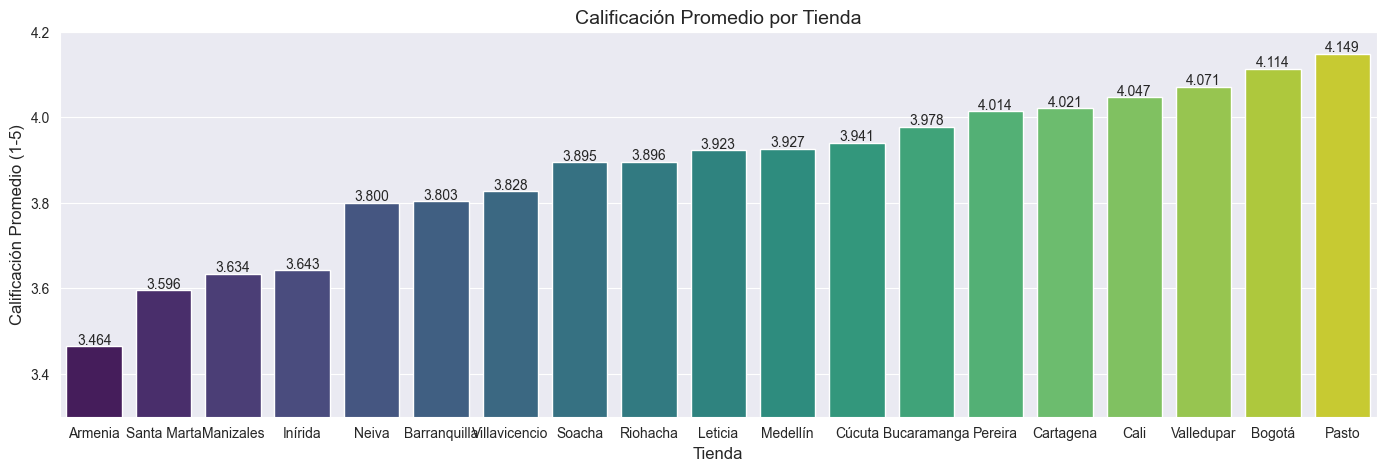

In [41]:
# Creamos la figura del gráfico
plt.figure(figsize=(17, 5))

# Creamos el gráfico de barras, usando 'Tienda_ID' para el color para evitar la advertencia
sns.barplot(
    x=calificacion_promedio.index,
    y=calificacion_promedio.values,
    hue=calificacion_promedio.index,
    legend=False,
    palette='viridis' # Un esquema de colores limpio
)

# Añadimos títulos
plt.title('Calificación Promedio por Tienda', fontsize=14)
plt.xlabel('Tienda', fontsize=12)
plt.ylabel('Calificación Promedio (1-5)', fontsize=12)

# Opcional: Ajustamos el eje Y (de 3.9 a 4.1) para que las diferencias se vean más claras
plt.ylim(3.3, 4.2)

# Añadimos el valor exacto del promedio sobre cada barra
for index, value in enumerate(calificacion_promedio.values):
    plt.text(index, value + 0.005, f'{value:.3f}', ha='center')

plt.savefig('calificacion_promedio_tienda.png') # Guardamos el gráfico
plt.show()

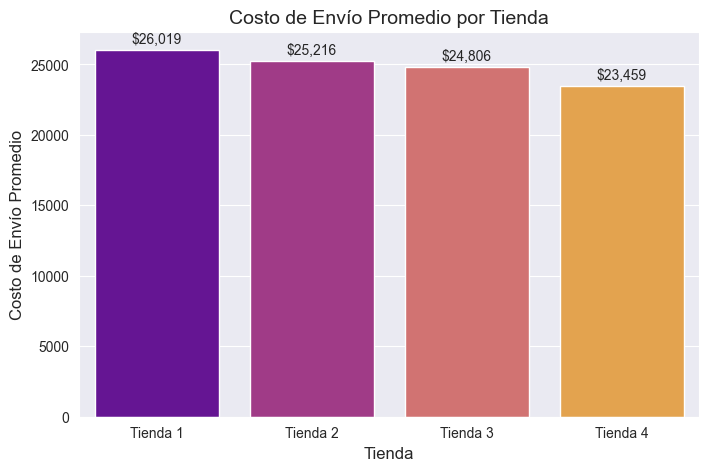

In [42]:
# Asegúrate de que esta variable exista en tu entorno, si no la tienes, cálcula:
costo_envio_promedio = listas.groupby('Tienda_ID')['Costo de envío'].mean().sort_values(ascending=False)

# 1. Creamos la figura del gráfico
plt.figure(figsize=(8, 5))

# 2. Creamos el gráfico de barras
sns.barplot(
    x=costo_envio_promedio.index,
    y=costo_envio_promedio.values,
    hue=costo_envio_promedio.index,
    legend=False,
    palette='plasma' # Otro esquema de colores
)

# 3. Añadimos títulos
plt.title('Costo de Envío Promedio por Tienda', fontsize=14)
plt.xlabel('Tienda', fontsize=12)
plt.ylabel('Costo de Envío Promedio', fontsize=12)

# 4. Añadimos el valor exacto del promedio sobre cada barra
for index, value in enumerate(costo_envio_promedio.values):
    # Formateamos el número para que sea más legible (sin decimales)
    plt.text(index, value + 500, f'${value:,.0f}', ha='center')

plt.savefig('costo_envio_tienda.png') # Guardamos el gráfico
plt.show()

# 4. Productos más y menos vendidos

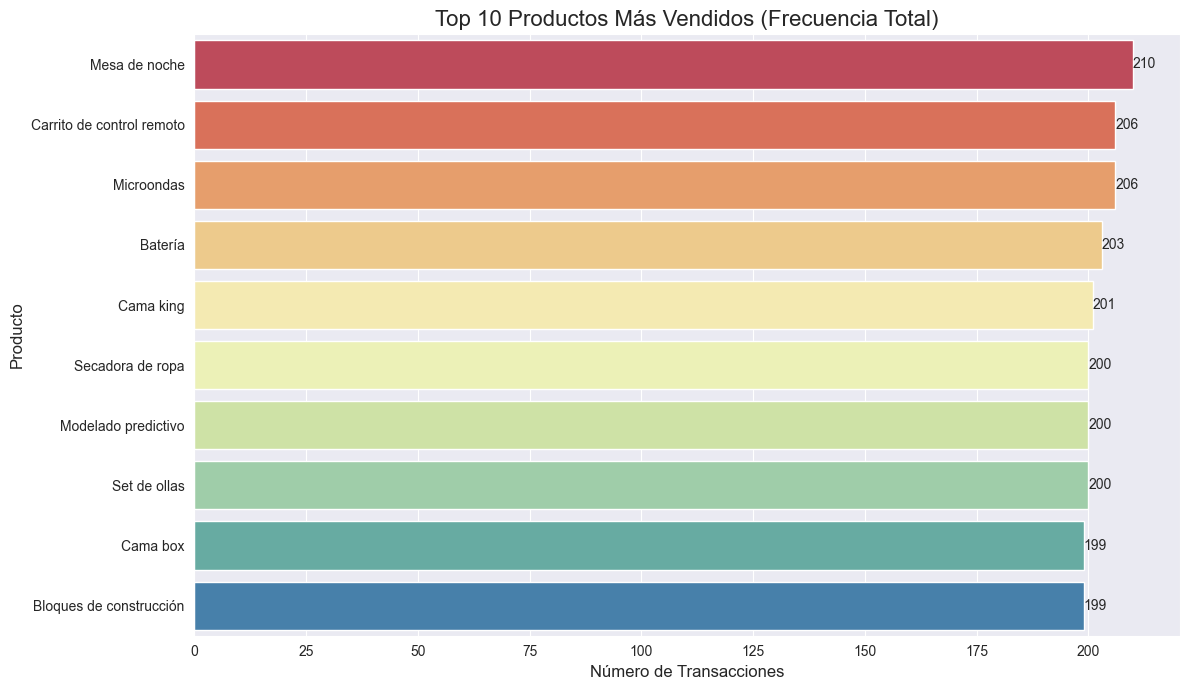

In [43]:
# 1. Calculamos los 10 productos más vendidos por frecuencia
top_10_productos = listas['Producto'].value_counts().head(10)

# 2. Creamos la figura con buen tamaño
plt.figure(figsize=(12, 7))

# 3. Creamos el gráfico de barras horizontales (orient='h')
sns.barplot(
    x=top_10_productos.values,
    y=top_10_productos.index,
    hue=top_10_productos.index, # Para el esquema de colores
    legend=False,
    palette='Spectral' # Un esquema de colores diferente
)

# 4. Añadimos títulos
plt.title('Top 10 Productos Más Vendidos (Frecuencia Total)', fontsize=16)
plt.xlabel('Número de Transacciones', fontsize=12)
plt.ylabel('Producto', fontsize=12)

# 5. Añadimos etiquetas de valor a la derecha de cada barra
for i, (value, name) in enumerate(zip(top_10_productos.values, top_10_productos.index)):
    plt.text(value, i, f'{value}', va='center')

# 6. Ajustamos el layout
plt.tight_layout()
plt.savefig('top_10_productos_frecuencia.png')
plt.show()

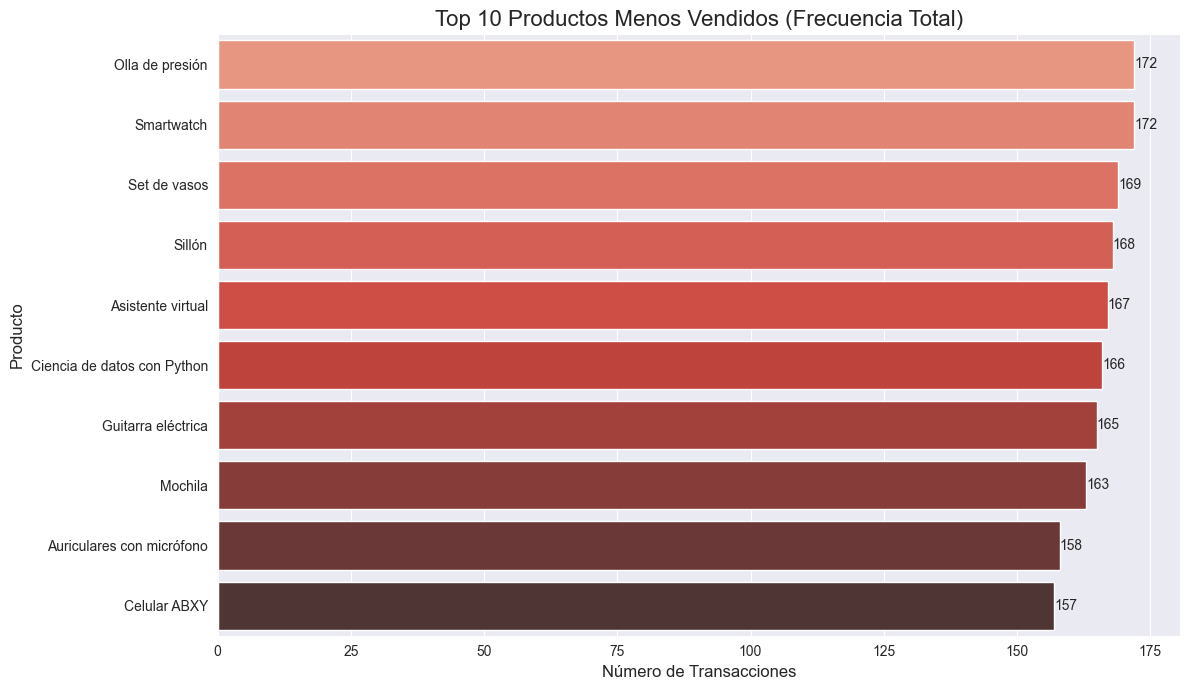

In [44]:
# 1. Calculamos los 10 productos menos vendidos
# Usamos .value_counts().tail(10) para obtener los 10 productos con menor frecuencia
bottom_10_productos = listas['Producto'].value_counts().tail(10)

# 2. Ordenamos de menor a mayor (de arriba abajo) para que el menos vendido quede en la parte superior
bottom_10_productos = bottom_10_productos.sort_values(ascending=False)

# 3. Creamos la figura con buen tamaño
plt.figure(figsize=(12, 7))

# 4. Creamos el gráfico de barras horizontales (orient='h')
sns.barplot(
    x=bottom_10_productos.values,
    y=bottom_10_productos.index,
    hue=bottom_10_productos.index, # Para el esquema de colores
    legend=False,
    palette='Reds_d' # Un esquema de colores que alerte sobre bajo rendimiento
)

# 5. Añadimos títulos
plt.title('Top 10 Productos Menos Vendidos (Frecuencia Total)', fontsize=16)
plt.xlabel('Número de Transacciones', fontsize=12)
plt.ylabel('Producto', fontsize=12)

# 6. Añadimos etiquetas de valor a la derecha de cada barra
for i, (value, name) in enumerate(zip(bottom_10_productos.values, bottom_10_productos.index)):
    plt.text(value, i, f'{value}', va='center')

# 7. Ajustamos el layout
plt.tight_layout()
plt.savefig('bottom_10_productos_frecuencia.png')
plt.show()

# 5. Envío promedio por tienda

In [45]:
# --- Cargar los datos (si es necesario) ---
# Asumo que ya tienes 'tienda', 'tienda2', 'tienda3', 'tienda4' cargados.

# --- Añadir la columna identificadora ---
tienda['Tienda_ID'] = 'Tienda 1'
tienda2['Tienda_ID'] = 'Tienda 2'
tienda3['Tienda_ID'] = 'Tienda 3'
tienda4['Tienda_ID'] = 'Tienda 4'

# Usamos ignore_index=True para que el índice se reinicie correctamente
listas = pd.concat([tienda, tienda2, tienda3, tienda4], ignore_index=True)

# --- Comprobación (opcional) ---
# Esto te mostrará cuántas filas tienes de cada tienda
print(listas['Tienda_ID'].value_counts())

Tienda_ID
Tienda 1    2359
Tienda 2    2359
Tienda 3    2359
Tienda 4    2358
Name: count, dtype: int64


In [46]:
listas.groupby('Tienda_ID')['Costo de envío'].mean()

Tienda_ID
Tienda 1    26018.609580
Tienda 2    25216.235693
Tienda 3    24805.680373
Tienda 4    23459.457167
Name: Costo de envío, dtype: float64

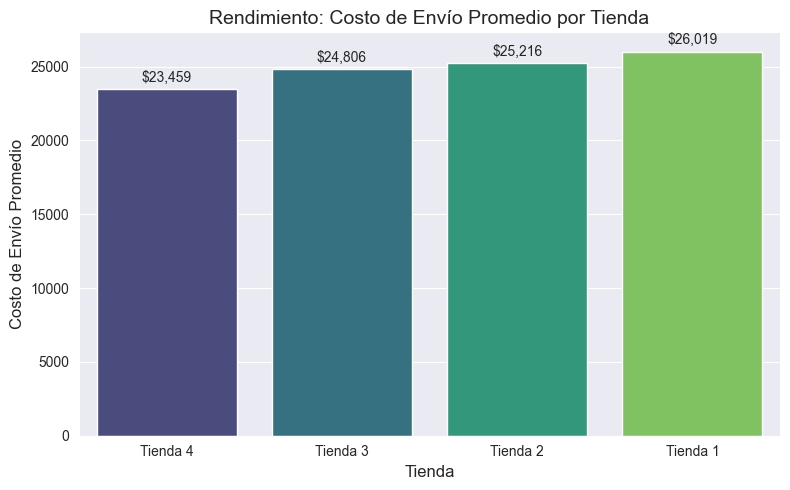

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ordenamos los datos de menor a mayor costo (ascending=True),
# ya que un menor costo de envío representa mejor desempeño.
costo_envio_promedio_ordenado = costo_envio_promedio.sort_values(ascending=True)

# Creamos la figura del gráfico
plt.figure(figsize=(8, 5))

# Creamos el gráfico de barras
sns.barplot(
    x=costo_envio_promedio_ordenado.index,
    y=costo_envio_promedio_ordenado.values,
    hue=costo_envio_promedio_ordenado.index,
    legend=False,
    palette='viridis' # Un esquema de color fuerte para el rendimiento
)

# Añadimos títulos
plt.title('Rendimiento: Costo de Envío Promedio por Tienda', fontsize=14)
plt.xlabel('Tienda', fontsize=12)
plt.ylabel('Costo de Envío Promedio', fontsize=12)

# Añadimos el valor exacto del promedio sobre cada barra
for index, value in enumerate(costo_envio_promedio_ordenado.values):
    # Formateamos el número para que sea más legible (sin decimales)
    plt.text(index, value + 500, f'${value:,.0f}', ha='center')

plt.tight_layout()
plt.savefig('rendimiento_envio_tiendas.png')
plt.show()